# Introduction to Quantum Computing: The Deutsch Algorithm

This notebook provides a comprehensive introduction to the Deutsch algorithm, one of the first quantum algorithms to demonstrate a quantum advantage over classical computing. We'll explore the theoretical foundations, mathematical formulation, and implementation using Qiskit.

## Table of Contents

1. [Introduction to Quantum Computing](#introduction)
2. [The Classical Problem](#classical-problem)
3. [The Deutsch Algorithm: Theoretical Foundation](#theoretical-foundation)
4. [Mathematical Formulation](#mathematical-formulation)
5. [Implementation in Qiskit](#implementation)
6. [Analysis and Visualization](#analysis)
7. [Extension to Deutsch-Jozsa Algorithm](#extension)
8. [Conclusion and Significance](#conclusion)
9. [References](#references)

<a id="introduction"></a>
## 1. Introduction to Quantum Computing

Quantum computing leverages the principles of quantum mechanics to process information in ways that classical computers cannot. The fundamental unit of quantum information is the quantum bit, or **qubit**. Unlike classical bits that can only be in states 0 or 1, qubits can exist in a **superposition** of both states simultaneously.

A qubit's state is mathematically represented as:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $\alpha$ and $\beta$ are complex probability amplitudes with $|\alpha|^2 + |\beta|^2 = 1$.

Key quantum computing concepts include:

1. **Superposition**: Qubits can exist in multiple states simultaneously
2. **Entanglement**: Quantum states can be correlated in ways that have no classical analog
3. **Interference**: Quantum amplitudes can interfere constructively or destructively
4. **Measurement**: Observing a quantum system collapses its state to a classical outcome

These properties enable quantum algorithms to solve certain problems more efficiently than classical algorithms. The Deutsch algorithm, which we'll explore in this notebook, was one of the first to demonstrate this quantum advantage.

<a id="classical-problem"></a>
## 2. The Classical Problem

The Deutsch algorithm addresses a specific problem involving a black-box function (also called an oracle). Let's define the problem:

- We have a function $f: \{0,1\} \rightarrow \{0,1\}$ that maps a single bit to a single bit
- The function is guaranteed to be either **constant** or **balanced**:
  - **Constant**: $f(0) = f(1)$ (either both outputs are 0 or both are 1)
  - **Balanced**: $f(0) \neq f(1)$ (one output is 0 and the other is 1)
- The goal is to determine whether $f$ is constant or balanced

### Classical Solution

In the classical approach, we would need to evaluate the function twice:
1. Compute $f(0)$
2. Compute $f(1)$
3. Compare the results to determine if $f$ is constant or balanced

This requires two function evaluations, which is the minimum possible in the classical case since we need to know both $f(0)$ and $f(1)$ to make a determination.

### The Quantum Advantage

The Deutsch algorithm can solve this problem with just **one** function evaluation, demonstrating a quantum advantage. While this specific problem is simple, it laid the foundation for more complex quantum algorithms that offer significant speedups for practical problems.

<a id="theoretical-foundation"></a>
## 3. The Deutsch Algorithm: Theoretical Foundation

The Deutsch algorithm leverages quantum superposition and interference to determine whether a function is constant or balanced with a single query.

### Key Insight

The key insight is that we can evaluate the function on a superposition of inputs, effectively computing $f(0)$ and $f(1)$ simultaneously. Then, through clever quantum interference, we can extract the information we need (whether $f$ is constant or balanced) without explicitly knowing the individual values $f(0)$ and $f(1)$.

### Quantum Oracle

To implement the function $f$ in a quantum circuit, we need a **quantum oracle** $U_f$ that performs the transformation:

$$U_f|x\rangle|y\rangle = |x\rangle|y \oplus f(x)\rangle$$

where $\oplus$ represents addition modulo 2 (XOR operation). This preserves the input $x$ and flips the second qubit if $f(x) = 1$.

### Algorithm Steps

1. Initialize two qubits: $|0\rangle|1\rangle$
2. Apply Hadamard gates to both qubits: $H|0\rangle H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$
3. Apply the oracle $U_f$
4. Apply another Hadamard gate to the first qubit
5. Measure the first qubit

The result will tell us whether $f$ is constant or balanced:
- If the first qubit is measured as $|0\rangle$, then $f$ is constant
- If the first qubit is measured as $|1\rangle$, then $f$ is balanced

<a id="mathematical-formulation"></a>
## 4. Mathematical Formulation

Let's walk through the mathematical steps of the Deutsch algorithm to understand why it works.

### Initial State

We start with two qubits in the state $|0\rangle|1\rangle$.

### Step 1: Apply Hadamard Gates

Applying Hadamard gates to both qubits:

$$H|0\rangle H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \cdot \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \frac{1}{2}\sum_{x,y \in \{0,1\}} (-1)^{xy}|x\rangle|y\rangle$$

This simplifies to:

$$\frac{1}{2}(|0\rangle(|0\rangle - |1\rangle) + |1\rangle(|0\rangle - |1\rangle)) = \frac{1}{\sqrt{2}}\sum_{x \in \{0,1\}} |x\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

### Step 2: Apply the Oracle $U_f$

The oracle transforms the state to:

$$\frac{1}{2}\sum_{x \in \{0,1\}} |x\rangle(|f(x) \oplus 0\rangle - |f(x) \oplus 1\rangle)$$

Since $f(x) \oplus 0 = f(x)$ and $f(x) \oplus 1 = \neg f(x)$ (the negation of $f(x)$), we get:

$$\frac{1}{2}\sum_{x \in \{0,1\}} |x\rangle(|f(x)\rangle - |\neg f(x)\rangle)$$

This can be rewritten as:

$$\frac{1}{2}\sum_{x \in \{0,1\}} (-1)^{f(x)}|x\rangle(|0\rangle - |1\rangle)$$

### Step 3: Apply Hadamard to the First Qubit

Applying a Hadamard gate to the first qubit:

$$\frac{1}{2}\sum_{x,y \in \{0,1\}} (-1)^{f(x)+xy}|y\rangle(|0\rangle - |1\rangle)$$

This simplifies to:

$$\frac{1}{2}\left[((-1)^{f(0)} + (-1)^{f(1)})|0\rangle + ((-1)^{f(0)} - (-1)^{f(1)})|1\rangle\right] \otimes \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

### Analysis of the Result

Now, let's analyze what happens for constant and balanced functions:

1. **If $f$ is constant** (i.e., $f(0) = f(1)$):
   - If $f(0) = f(1) = 0$, then $(-1)^{f(0)} + (-1)^{f(1)} = 1 + 1 = 2$ and $(-1)^{f(0)} - (-1)^{f(1)} = 1 - 1 = 0$
   - If $f(0) = f(1) = 1$, then $(-1)^{f(0)} + (-1)^{f(1)} = -1 + (-1) = -2$ and $(-1)^{f(0)} - (-1)^{f(1)} = -1 - (-1) = 0$
   - In both cases, the coefficient of $|1\rangle$ is zero, so we'll always measure the first qubit as $|0\rangle$

2. **If $f$ is balanced** (i.e., $f(0) \neq f(1)$):
   - If $f(0) = 0$ and $f(1) = 1$, then $(-1)^{f(0)} + (-1)^{f(1)} = 1 + (-1) = 0$ and $(-1)^{f(0)} - (-1)^{f(1)} = 1 - (-1) = 2$
   - If $f(0) = 1$ and $f(1) = 0$, then $(-1)^{f(0)} + (-1)^{f(1)} = -1 + 1 = 0$ and $(-1)^{f(0)} - (-1)^{f(1)} = -1 - 1 = -2$
   - In both cases, the coefficient of $|0\rangle$ is zero, so we'll always measure the first qubit as $|1\rangle$

Therefore, by measuring the first qubit, we can determine whether $f$ is constant or balanced with just one evaluation of the function!

<a id="implementation"></a>
## 5. Implementation in Qiskit

Now, let's implement the Deutsch algorithm using Qiskit. We'll first import the necessary libraries:

In [124]:
# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Import NumPy for numerical operations
import numpy as np

# Import Matplotlib for visualization
import matplotlib.pyplot as plt

### Implementing the Deutsch Algorithm

We'll create a function that implements the Deutsch algorithm for a given oracle type:

In [125]:
def deutsch_algorithm(oracle_type='constant', oracle_value=0):
    """
    Implement the Deutsch algorithm.
    
    Args:
        oracle_type (str): 'constant' or 'balanced'
        oracle_value (int): For constant oracle, the constant value (0 or 1)
                           For balanced oracle, this determines which balanced function to use:
                           0: f(x) = x (identity)
                           1: f(x) = NOT(x) (negation)
    
    Returns:
        QuantumCircuit: The complete Deutsch algorithm circuit
    """
    # Create a circuit with 2 qubits (1 input qubit + 1 output qubit) and 1 classical bit
    deutsch_circuit = QuantumCircuit(2, 1)
    
    # Step 1: Initialize the output qubit in state |1⟩
    deutsch_circuit.x(1)
    
    # Step 2: Apply Hadamard gates to both qubits
    deutsch_circuit.h(0)
    deutsch_circuit.h(1)
    
    deutsch_circuit.barrier()  # For visual separation
    
    # Step 3: Apply the oracle
    if oracle_type == 'constant':
        # Constant oracle
        if oracle_value == 1:
            # If f(x) = 1 for all x, apply X to the output qubit
            deutsch_circuit.x(1)
    else:  # balanced
        if oracle_value == 0:
            # f(x) = x (identity function)
            deutsch_circuit.cx(0, 1)
        else:
            # f(x) = NOT(x) (negation function)
            deutsch_circuit.x(0)  # Flip the input
            deutsch_circuit.cx(0, 1)  # Apply CNOT
            deutsch_circuit.x(0)  # Flip back the input (to preserve the input state)
    
    deutsch_circuit.barrier()
    
    # Step 4: Apply Hadamard gate to the input qubit
    deutsch_circuit.h(0)
    
    # Step 5: Measure the input qubit
    deutsch_circuit.measure(0, 0)
    
    return deutsch_circuit

### Creating and Visualizing the Circuits

Now, let's create circuits for different types of oracles and visualize them:

Circuit for constant function f(x) = 0:


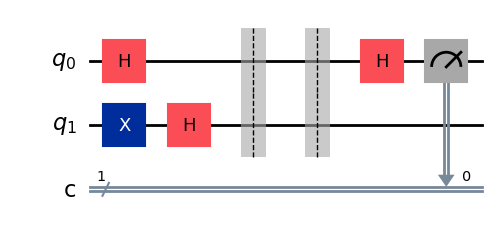

Circuit for constant function f(x) = 1:


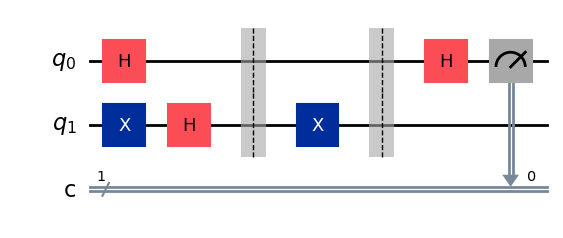

Circuit for balanced function f(x) = x:


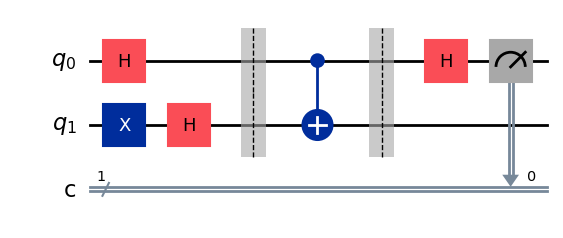

Circuit for balanced function f(x) = NOT(x):


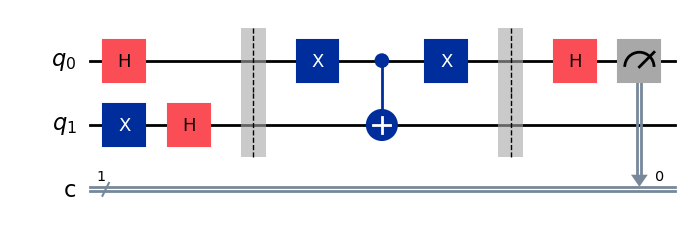

In [126]:
# Create a circuit with a constant oracle (f(x) = 0 for all x)
constant_0_circuit = deutsch_algorithm('constant', 0)
print("Circuit for constant function f(x) = 0:")
display(constant_0_circuit.draw(output='mpl'))

# Create a circuit with a constant oracle (f(x) = 1 for all x)
constant_1_circuit = deutsch_algorithm('constant', 1)
print("Circuit for constant function f(x) = 1:")
display(constant_1_circuit.draw(output='mpl'))

# Create a circuit with a balanced oracle (f(x) = x)
balanced_id_circuit = deutsch_algorithm('balanced', 0)
print("Circuit for balanced function f(x) = x:")
display(balanced_id_circuit.draw(output='mpl'))

# Create a circuit with a balanced oracle (f(x) = NOT(x))
balanced_not_circuit = deutsch_algorithm('balanced', 1)
print("Circuit for balanced function f(x) = NOT(x):")
display(balanced_not_circuit.draw(output='mpl'))

<a id="analysis"></a>
## 6. Analysis and Visualization

Let's run the circuits on a quantum simulator and analyze the results:

Results for constant function f(x) = 0:


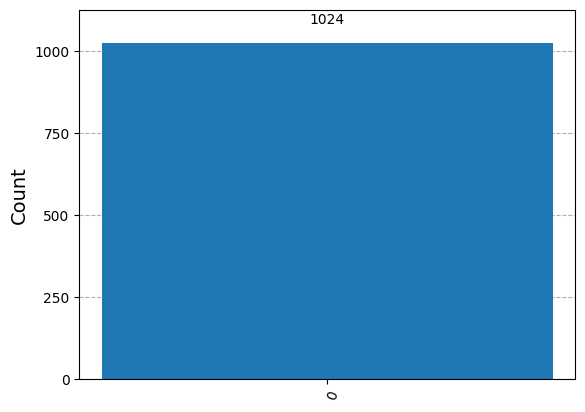

The function is CONSTANT (measured |0⟩ with high probability)


Results for constant function f(x) = 1:


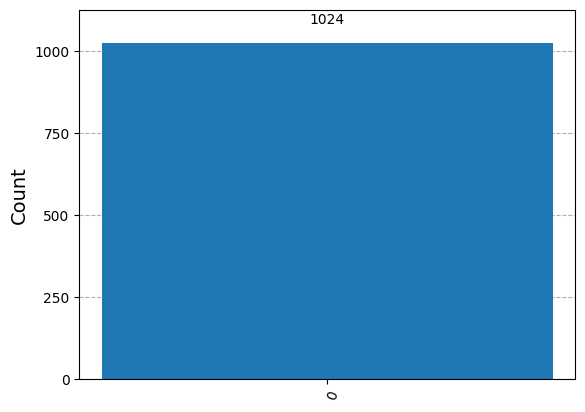

The function is CONSTANT (measured |0⟩ with high probability)


Results for balanced function f(x) = x:


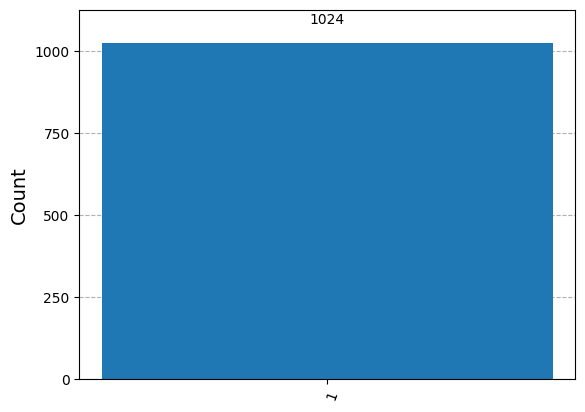

The function is BALANCED (measured |1⟩ with high probability)


Results for balanced function f(x) = NOT(x):


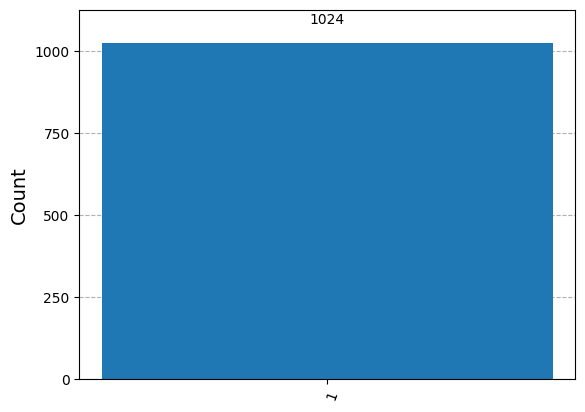

The function is BALANCED (measured |1⟩ with high probability)




In [127]:
# Initialize the simulator
simulator = BasicSimulator()

# Function to run the circuit and display results
def run_and_display(circuit, name):
    result = simulator.run(circuit, shots=1024).result()
    counts = result.get_counts()
    print(f"Results for {name}:")
    display(plot_histogram(counts))
    
    # Interpret the results
    if '0' in counts and counts['0'] > counts.get('1', 0):
        print(f"The function is CONSTANT (measured |0⟩ with high probability)")
    else:
        print(f"The function is BALANCED (measured |1⟩ with high probability)")
    print("\n")
    
    return counts

# Run and display results for all circuits
constant_0_counts = run_and_display(constant_0_circuit, "constant function f(x) = 0")
constant_1_counts = run_and_display(constant_1_circuit, "constant function f(x) = 1")
balanced_id_counts = run_and_display(balanced_id_circuit, "balanced function f(x) = x")
balanced_not_counts = run_and_display(balanced_not_circuit, "balanced function f(x) = NOT(x)")

### Visualizing the Quantum States

To better understand how the Deutsch algorithm works, let's visualize the quantum states at different stages of the algorithm for the constant function f(x) = 0:

State after initialization:
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


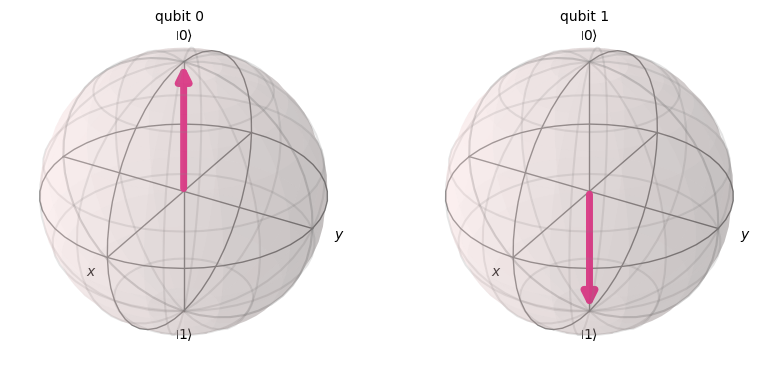


State after applying Hadamard gates:
Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


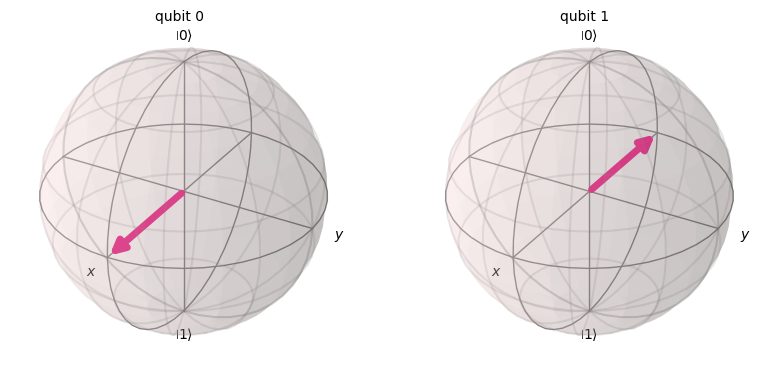


State after applying the oracle:
Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


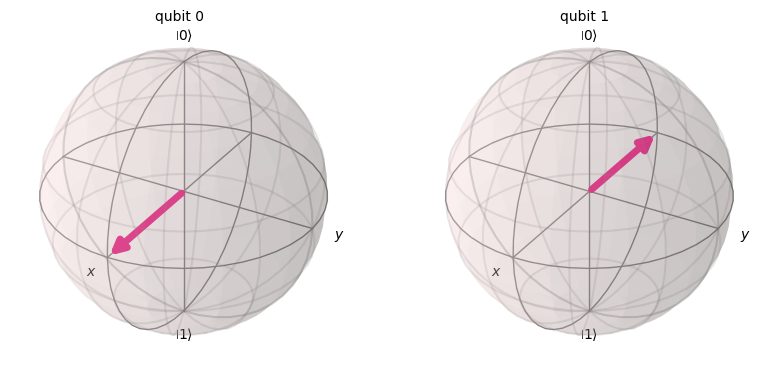


State after applying the final Hadamard gate:
Statevector([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


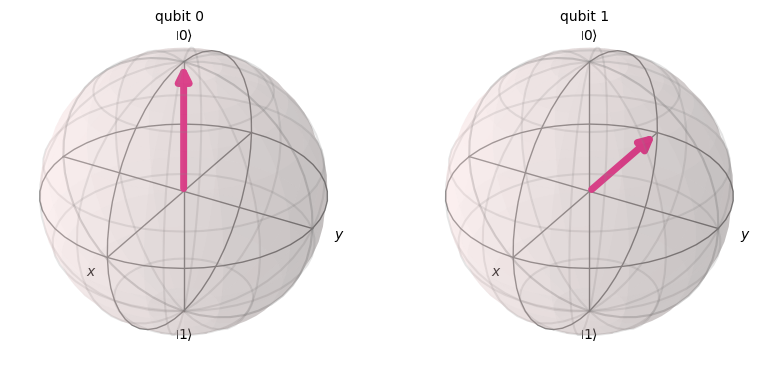

In [128]:
# Create a circuit for visualization (without measurement)
vis_circuit = QuantumCircuit(2)

# Step 1: Initialize the output qubit in state |1⟩
vis_circuit.x(1)
state_after_init = Statevector(vis_circuit)

# Step 2: Apply Hadamard gates to both qubits
vis_circuit.h(0)
vis_circuit.h(1)
state_after_h = Statevector(vis_circuit)

# Step 3: Apply the oracle (constant function f(x) = 0)
# For f(x) = 0, we don't need to do anything
state_after_oracle = Statevector(vis_circuit)

# Step 4: Apply Hadamard gate to the input qubit
vis_circuit.h(0)
state_after_final_h = Statevector(vis_circuit)

# Display the states
print("State after initialization:")
print(state_after_init)
display(plot_bloch_multivector(state_after_init))

print("\nState after applying Hadamard gates:")
print(state_after_h)
display(plot_bloch_multivector(state_after_h))

print("\nState after applying the oracle:")
print(state_after_oracle)
display(plot_bloch_multivector(state_after_oracle))

print("\nState after applying the final Hadamard gate:")
print(state_after_final_h)
display(plot_bloch_multivector(state_after_final_h))

<a id="extension"></a>
## 7. Extension to Deutsch-Jozsa Algorithm

The Deutsch algorithm can be extended to handle functions that take multiple bits as input. This extension is known as the **Deutsch-Jozsa algorithm**.

### Problem Statement

In the Deutsch-Jozsa algorithm, we consider a function $f: \{0,1\}^n \rightarrow \{0,1\}$ that maps an n-bit input to a single bit output. The function is promised to be either:

- **Constant**: Returns the same output for all inputs
- **Balanced**: Returns 0 for exactly half of all possible inputs, and 1 for the other half

The goal is to determine whether $f$ is constant or balanced.

### Classical Solution

Classically, in the worst case, we would need to evaluate the function for $2^{n-1} + 1$ different inputs to be certain whether it's constant or balanced. This is because if we check $2^{n-1}$ inputs and they all give the same result, the function could still be balanced if the remaining inputs all give the opposite result.

### Quantum Solution

The Deutsch-Jozsa algorithm can solve this problem with just **one** function evaluation, regardless of the value of $n$. This provides an exponential speedup over the classical approach.

The algorithm follows similar steps to the Deutsch algorithm, but with $n$ input qubits instead of just one:

1. Initialize $n+1$ qubits: $|0\rangle^{\otimes n}|1\rangle$
2. Apply Hadamard gates to all qubits
3. Apply the oracle $U_f$
4. Apply Hadamard gates to the input qubits
5. Measure the input qubits

If all input qubits are measured as $|0\rangle$, then $f$ is constant. Otherwise, $f$ is balanced.

For a more detailed implementation of the Deutsch-Jozsa algorithm, refer to the [Qiskit Algorithms notebook](notebooks/qiskit_algorithms.ipynb) in this repository.

<a id="conclusion"></a>
## 8. Conclusion and Significance

The Deutsch algorithm, while solving a relatively simple problem, has profound implications for quantum computing:

1. **Historical Significance**: It was one of the first algorithms to demonstrate a provable quantum advantage over classical algorithms.

2. **Conceptual Foundation**: It introduced key concepts like quantum parallelism and interference that are central to more complex quantum algorithms.

3. **Pedagogical Value**: The algorithm serves as an excellent introduction to quantum computing, illustrating how quantum properties can be harnessed for computational advantage.

4. **Stepping Stone**: The extension to the Deutsch-Jozsa algorithm paved the way for more powerful quantum algorithms like Grover's search algorithm and Shor's factoring algorithm.

While the specific problem solved by the Deutsch algorithm may not have immediate practical applications, the principles it demonstrates are fundamental to the field of quantum computing. It shows that quantum computers can, in principle, solve certain problems more efficiently than classical computers, opening up new possibilities for computational tasks that were previously considered intractable.

<a id="references"></a>
## 9. References

1. Deutsch, D. (1985). Quantum theory, the Church-Turing principle and the universal quantum computer. Proceedings of the Royal Society of London A, 400(1818), 97-117.

2. Deutsch, D., & Jozsa, R. (1992). Rapid solution of problems by quantum computation. Proceedings of the Royal Society of London A, 439(1907), 553-558.

3. Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information. Cambridge University Press.

4. Qiskit Documentation: https://qiskit.org/documentation/

5. IBM Quantum Learning Resources: https://learning.quantum.ibm.com/

6. Wong, T. G. (2022). Introduction to classical and quantum computing. Rooted Grove. Retrieved from https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf

7. Mermin, N. D. (2007). Quantum Computer Science: An Introduction. Cambridge University Press.